In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [58]:
df = sns.load_dataset('flights')
df

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [59]:
df['yearMonth'] = pd.to_datetime("01-"+df['month'].astype(str)+"-"+df['year'].astype(str))
df.set_index('yearMonth',inplace=True)
df.head()


,year,month,passengers
yearMonth,,,
1949-01-01,1949,Jan,112
1949-02-01,1949,Feb,118
1949-03-01,1949,Mar,132
1949-04-01,1949,Apr,129
1949-05-01,1949,May,121


<Axes: xlabel='yearMonth', ylabel='passengers'>

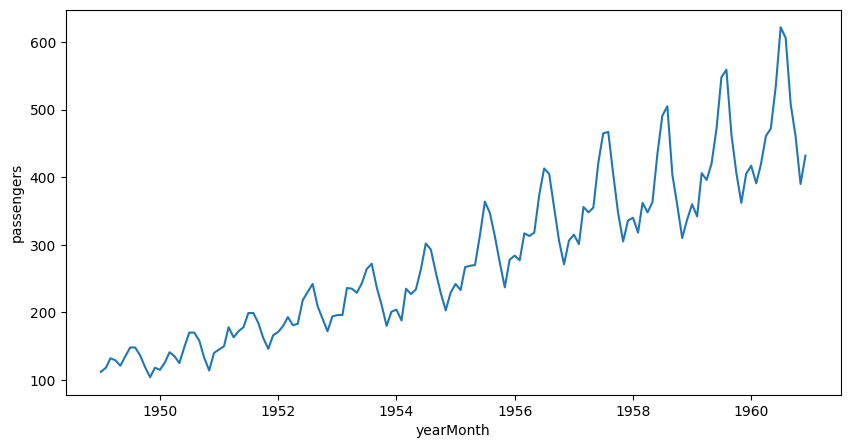

In [60]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x=df.index,y=df.passengers)


# checking the stationarity of data using rolling statistics

In [61]:


df['rollMean']  = df.passengers.rolling(window=12).mean()
df['rollStd']  = df.passengers.rolling(window=12).std()


In [62]:
df.head(20)

,year,month,passengers,rollMean,rollStd
yearMonth,,,,,
1949-01-01,1949,Jan,112,NaN,NaN
1949-02-01,1949,Feb,118,NaN,NaN
1949-03-01,1949,Mar,132,NaN,NaN
1949-04-01,1949,Apr,129,NaN,NaN
1949-05-01,1949,May,121,NaN,NaN
1949-06-01,1949,Jun,135,NaN,NaN
1949-07-01,1949,Jul,148,NaN,NaN
1949-08-01,1949,Aug,148,NaN,NaN
1949-09-01,1949,Sep,136,NaN,NaN


<Axes: xlabel='yearMonth', ylabel='passengers'>

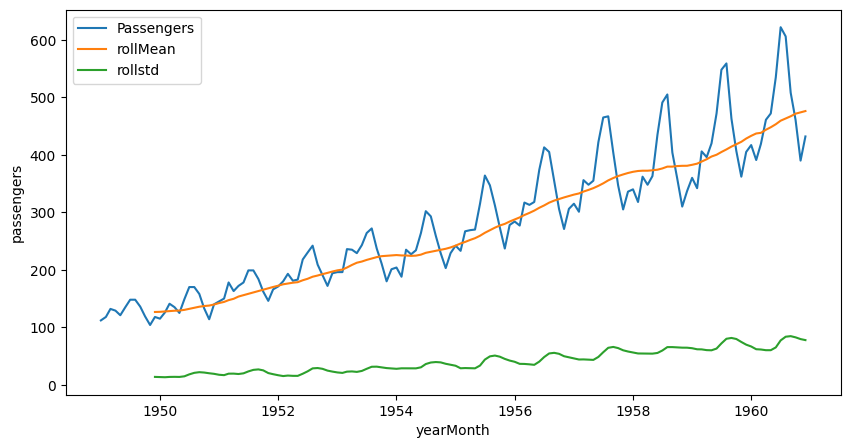

In [63]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x=df.index,y=df.passengers,label='Passengers')
sns.lineplot(data=df,x=df.index,y=df.rollMean,label='rollMean')
sns.lineplot(data=df,x=df.index,y=df.rollStd,label='rollstd')


> here we can see std is constant through out the time, but mean is not constant. it is showing trending pattern(i.e increasing with time)

> which conclude that our data is not stationary because for data to be stationary mean and std (variance) must need to be stationary through out the time

# checking stationarity using augmented dicky fuller

In [64]:
from statsmodels.tsa.stattools import adfuller

In [65]:
adfTest = adfuller(df['passengers'],autolag='AIC',)

In [66]:
adfTest

(0.8153688792060463,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [67]:
stats = pd.Series(adfTest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
stats

Test Statistic                   0.815369
p-value                          0.991880
#lags used                      13.000000
number of observations used    130.000000
dtype: float64

In [68]:
adfTest[4]

{'1%': -3.4816817173418295,
 '5%': -2.8840418343195267,
 '10%': -2.578770059171598}

In [69]:
for key, values in adfTest[4].items():
    print('criticality',key,":",values)

criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


> For data to be stationary " Test statistics < critical value "

> But we are getting critical values less then Test statistics so our data is not stationary

In [70]:
def test_stationarity(dataFrame, var):
    dataFrame['rollMean']  = dataFrame[var].rolling(window=12).mean()
    dataFrame['rollStd']  = dataFrame[var].rolling(window=12).std()
    
    from statsmodels.tsa.stattools import adfuller
    adfTest = adfuller(dataFrame[var],autolag='AIC')
    stats = pd.Series(adfTest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
    print(stats)
    
    for key, values in adfTest[4].items():
        print('criticality',key,":",values)
        
    sns.lineplot(data=dataFrame,x=dataFrame.index,y=var,label=var)
    sns.lineplot(data=dataFrame,x=dataFrame.index,y='rollMean',label='rollMean')
    sns.lineplot(data=dataFrame,x=dataFrame.index,y='rollStd',label='rollStd')


In [71]:
df.head()

,year,month,passengers,rollMean,rollStd
yearMonth,,,,,
1949-01-01,1949,Jan,112,NaN,NaN
1949-02-01,1949,Feb,118,NaN,NaN
1949-03-01,1949,Mar,132,NaN,NaN
1949-04-01,1949,Apr,129,NaN,NaN
1949-05-01,1949,May,121,NaN,NaN


Test Statistic                   0.815369
p-value                          0.991880
#lags used                      13.000000
number of observations used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


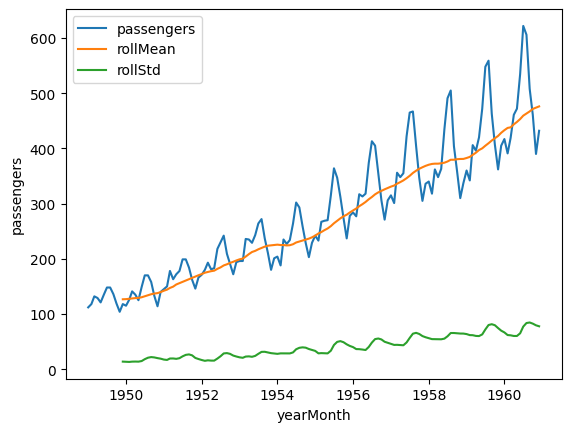

In [72]:
test_stationarity(df,'passengers')

# Making data stationary

##### Method 1 - Time shift- in this we shift the value of dependent variable by a specific intervals( example by 1 months(lag))
##### method 2 - Log ( we find the log of the dependent variable values )
##### method 3 - Square Root/cube ( in this we find the cube or square root of dependent variable values)

In [73]:
# using time shift

In [74]:
air = df[['passengers']]
air_df = air.copy()
air_df.head()


,passengers
yearMonth,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [75]:

air_df['shift'] = air_df.passengers.shift() # shifting by 1 month, if  want to shift by 2 month write shift(2)
air_df['shiftDiff'] = air_df['passengers'] - air_df['shift']
air_df.head()




,passengers,shift,shiftDiff
yearMonth,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,112.0,6.0
1949-03-01,132,118.0,14.0
1949-04-01,129,132.0,-3.0
1949-05-01,121,129.0,-8.0


Test Statistic                  -2.829267
p-value                          0.054213
#lags used                      12.000000
number of observations used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


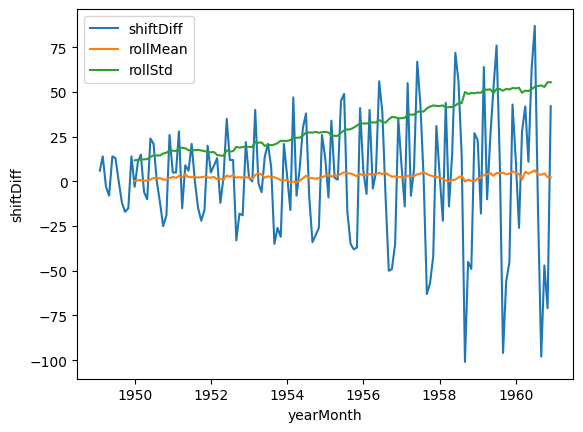

In [76]:
test_stationarity(air_df.copy().dropna(),'shiftDiff')

> Here after doing  time shift we can see though our mean is constant but still standard deviation and variance is still varying so our data is still not stationary after using time shift

# Log transforrmation

In [78]:
df_log = df[['passengers']]
log_df = df_log.copy()
log_df['log'] = np.log(log_df['passengers'])
log_df.head()


,passengers,log
yearMonth,,
1949-01-01,112,4.718499
1949-02-01,118,4.770685
1949-03-01,132,4.882802
1949-04-01,129,4.859812
1949-05-01,121,4.795791


Test Statistic                  -1.717017
p-value                          0.422367
#lags used                      13.000000
number of observations used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


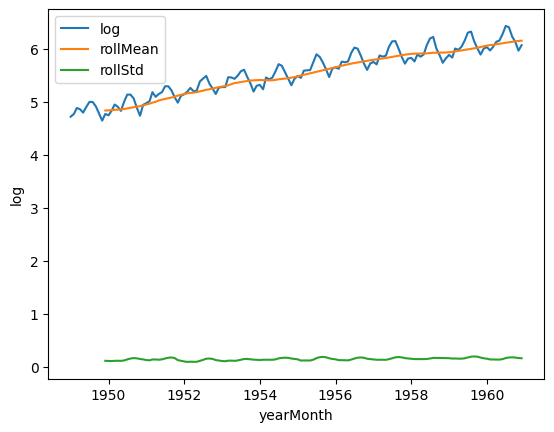

In [79]:
test_stationarity(log_df,'log')


> here we can see mean is varying

> Log p-value is greater than shift p value

# using square root

In [80]:
df_sqrt = df[['passengers']]
sqrt_df = df_sqrt.copy()
sqrt_df['sqrt'] = np.sqrt(df['passengers'])
sqrt_df.head()

,passengers,sqrt
yearMonth,,
1949-01-01,112,10.583005
1949-02-01,118,10.862780
1949-03-01,132,11.489125
1949-04-01,129,11.357817
1949-05-01,121,11.000000


Test Statistic                  -0.345854
p-value                          0.918754
#lags used                      13.000000
number of observations used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


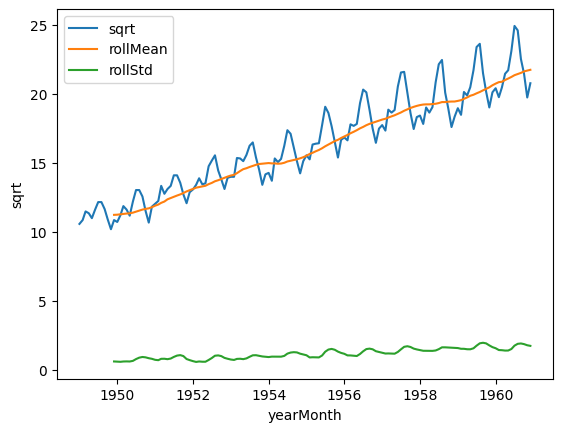

In [81]:
test_stationarity(sqrt_df,'sqrt')

> Here we can see p- value is 0.91

# using cube root

In [82]:
df_cbrt = df[['passengers']]
cbrt_df = df_cbrt.copy()
cbrt_df['cbrt'] = np.cbrt(cbrt_df['passengers'])
cbrt_df.head()


,passengers,cbrt
yearMonth,,
1949-01-01,112,4.820285
1949-02-01,118,4.904868
1949-03-01,132,5.091643
1949-04-01,129,5.052774
1949-05-01,121,4.946087


Test Statistic                  -0.810035
p-value                          0.816157
#lags used                      13.000000
number of observations used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


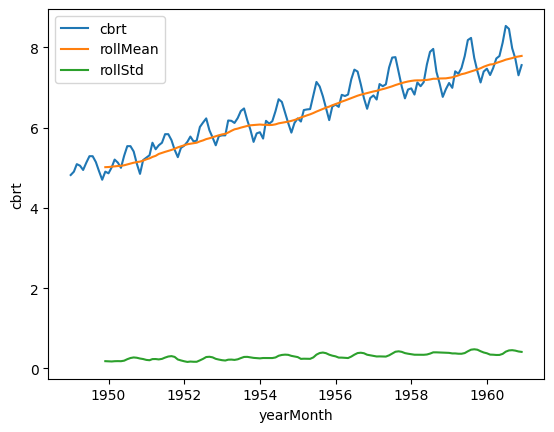

In [83]:
test_stationarity(cbrt_df,'cbrt')


> here from the above we get the best p-value for time shift

# combining log and square root

In [92]:
log_df2 = log_df[['passengers','log']].copy()
log_df2['log_sqrt'] = np.sqrt(log_df['log'])
log_df2.head()

,passengers,log,log_sqrt
yearMonth,,,
1949-01-01,112,4.718499,2.172211
1949-02-01,118,4.770685,2.184190
1949-03-01,132,4.882802,2.209706
1949-04-01,129,4.859812,2.204498
1949-05-01,121,4.795791,2.189929


Test Statistic                  -1.942528
p-value                          0.312326
#lags used                      13.000000
number of observations used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


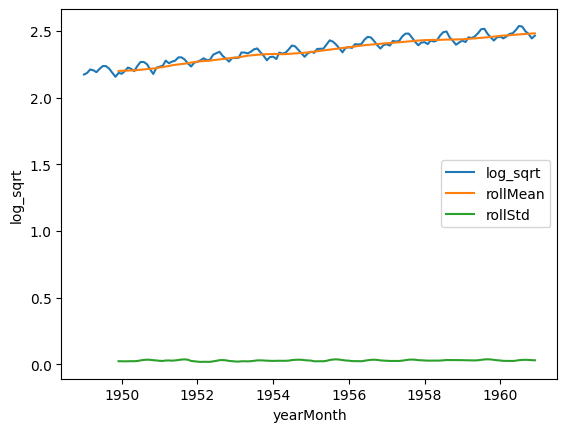

In [93]:
test_stationarity(log_df2.copy().dropna(),'log_sqrt')

In [95]:
log_df2 = log_df[['passengers','log']].copy()
log_df2['log_sqrt'] = np.sqrt(log_df['log'])
log_df2['logShiftDiff'] = log_df2['log_sqrt'] - log_df2['log_sqrt'].shift() # shifting log_sqrt
log_df2.head()


,passengers,log,log_sqrt,logShiftDiff
yearMonth,,,,
1949-01-01,112,4.718499,2.172211,NaN
1949-02-01,118,4.770685,2.184190,0.011979
1949-03-01,132,4.882802,2.209706,0.025517
1949-04-01,129,4.859812,2.204498,-0.005208
1949-05-01,121,4.795791,2.189929,-0.014569


Test Statistic                  -2.611019
p-value                          0.090741
#lags used                      14.000000
number of observations used    128.000000
dtype: float64
criticality 1% : -3.4825006939887997
criticality 5% : -2.884397984161377
criticality 10% : -2.578960197753906


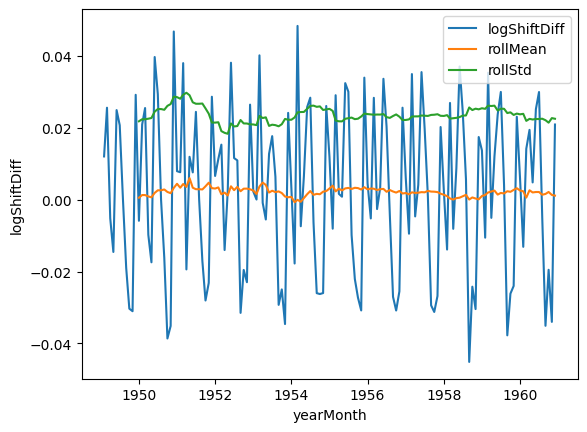

In [96]:
test_stationarity(log_df2.copy().dropna(),'logShiftDiff')

> still p-value of shift method is good 

# combining log and time shift method

In [88]:
log_shift = df[['passengers']].copy(deep=True)
log_shift['log'] = np.log(log_shift['passengers'])
log_shift['logShift'] = log_shift['log'].shift()
log_shift['logShiftDiff'] = log_shift['log'] - log_shift['logShift']
log_shift.head()


,passengers,log,logShift,logShiftDiff
yearMonth,,,,
1949-01-01,112,4.718499,NaN,NaN
1949-02-01,118,4.770685,4.718499,0.052186
1949-03-01,132,4.882802,4.770685,0.112117
1949-04-01,129,4.859812,4.882802,-0.022990
1949-05-01,121,4.795791,4.859812,-0.064022


Test Statistic                  -2.717131
p-value                          0.071121
#lags used                      14.000000
number of observations used    128.000000
dtype: float64
criticality 1% : -3.4825006939887997
criticality 5% : -2.884397984161377
criticality 10% : -2.578960197753906


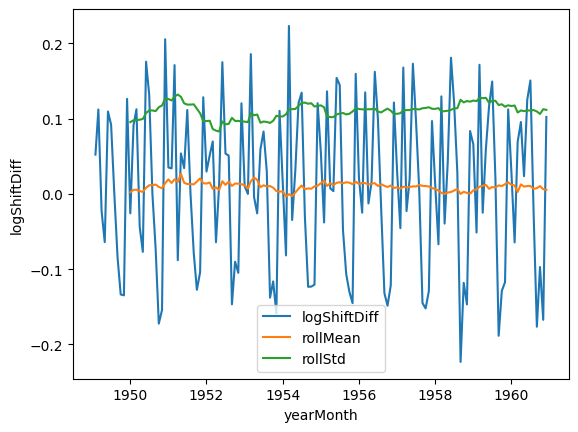

In [90]:
test_stationarity(log_shift.copy().dropna(),'logShiftDiff')

In [97]:
airP = df[['passengers']].copy(deep=True)
airP['firstDiff'] = airP['passengers'].diff() # 
airP['Diff12'] = airP['passengers'].diff(12)


In [99]:
airP.head(20)

,passengers,firstDiff,Diff12
yearMonth,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,NaN
1949-04-01,129,-3.0,NaN
1949-05-01,121,-8.0,NaN
1949-06-01,135,14.0,NaN
1949-07-01,148,13.0,NaN
1949-08-01,148,0.0,NaN
1949-09-01,136,-12.0,NaN


# Using arima

In [100]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf